Model1 Mean Squared Error (MSE): 2932.6816372003336
Model1 R-squared (R²): 0.5177484222203498
Model1 adjusted R-squared (R²): 0.5065592904853231
Using stepwise function, the best predictors are:  ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
Stepwise model's Mean Squared Error (MSE): 2922.9747064134735
Stepwise model's R-squared (R²): 0.5148837959256445


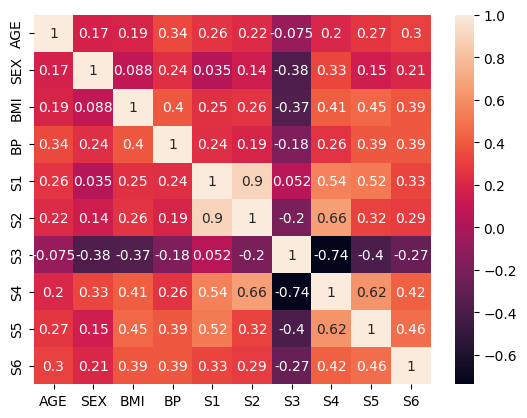

In [4]:
#DIAML Assignment 5 Qn3
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from stepwise_regression.step_reg import *
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_excel('Diabetes_Data.xlsx')

#Extract all rows and columns except the last column
X = data.iloc[:, :-1]

#Extract all rows of the last column (the target variable)
Y = data.iloc[:, -1]

#Compute the coefficient matrix
corrCoef = X.corr()

#Make a heatmap of the matrix 
sns.heatmap(corrCoef,annot=True)

3.2
"""
https://towardsdatascience.com/a-beginners-guide-to-collinearity-what-it-is-and-how-it-affects-our-regression-model-d442b421ff95
"""

# 3.3
# model1_ = LinearRegression()
# model1_.fit(X, Y)

# y_pred = model1_.predict(X)
# r2 = r2_score(Y, y_pred)
# mse = mean_squared_error(Y, y_pred)

# print(f"Model1_ Mean Squared Error (MSE): {mse}")
# print(f"Model1_ R-squared (R²): {r2}")

#Add a constant variable to the set of predictor variables
X_const = sm.add_constant(X)
#Fit the model
model1 = sm.OLS(Y, X_const).fit()
# print(model1.summary())

# Print the MSE and R-squared of model 1
print(f"Model1 Mean Squared Error (MSE): {model1.mse_resid}")
print(f"Model1 R-squared (R²): {model1.rsquared}")
print(f"Model1 adjusted R-squared (R²): {model1.rsquared_adj}")

#conclusion: Not all variables are significant and it's due to colinearity

#3.4
#https://quantifyinghealth.com/stepwise-selection/

"""
3.5 Step-wise variable selection

There are many ways of selecting variable for 
inclusion in a model
• Backward or forward step-wise approaches 
tend to involve:
• General to specific: start with all the variables 
included and reject variables one by one
• Specific to general: start with no variable and 
include one variable at a time
• In both cases a condition for the optimal fit 
provides a stopping criterion
"""
#Determine the best predictor variables
variables = forward_regression(X, Y, 0.05, verbose=False)

print(f'Using stepwise function, the best predictors are: ', variables)

#Building the model with best predictors
x_best = X[variables]
# print(x_best)
x_best = sm.add_constant(x_best)

#fit the model 
model1_better = sm.OLS(Y, x_best).fit()

#print the results
print(f"Stepwise model's Mean Squared Error (MSE): {model1_better.mse_resid}")
print(f"Stepwise model's R-squared (R²): {model1_better.rsquared}")


DIAML ASSIGNMENT 5 QUESTION 4

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)  
from prettytable import PrettyTable

data = pd.read_csv('titanic3.csv')

#4.1
#https://www.statology.org/logistic-regression-vs-linear-regression/
#https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning
#https://www.geeksforgeeks.org/understanding-logistic-regression/

#4.2
#The length of the dataframe of the survived passenger(1)
count_survival = len(data[data['survived'] == 1])
#The length of the whole dataframe(2)
outcomes = len(data)
#Compute the probabilty of 1 to 2
prob_survival = count_survival / outcomes
#Print out the results 
print(f'Probability of a person to survive on the titanic is: {prob_survival:.2f}')

#
pclass_summary = pd.crosstab(index=data['survived'], columns=data['pclass'], margins=True)
# print(pclass_summary)

# print(f'Survived P class 1: {pclass_summary.iloc[1, 0] / pclass_summary.iloc[2, 0]}')
# print(f'Survived P class 2: {pclass_summary.iloc[1, 1] / pclass_summary.iloc[2, 1]}')
# print(f'Survived P class 3: {pclass_summary.iloc[1, 2] / pclass_summary.iloc[2, 2]}')

gender_summary = pd.crosstab(index=data['survived'], columns=data['sex'], margins=True)
# print(gender_summary)

# print(f'Survived gender female: {gender_summary.iloc[1, 0] / gender_summary.iloc[2, 0]}')
# print(f'Survived gender male: {gender_summary.iloc[1, 1] / gender_summary.iloc[2, 1]}')

##
# Calculate survival probabilities by gender
gender_probabilities = data.groupby('sex')['survived'].mean().reset_index()
gender_probabilities.columns = ['Gender', 'Survival Probability']
# print(gender_probabilities)

pclass_probabilities = data.groupby('pclass')['survived'].mean().reset_index()
pclass_probabilities.columns = ['Passenger Class', 'Survival Probability']
# print(pclass_probabilities)

# define the age bins and labels
# bins = [0, 18, 25, 35, 45, 60, 100]
bins = [0, 25, 50, 75, 100]
# labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
labels = ['0-25', '26-50', '51-75', '+75']
data['ageRange'] = pd.cut(data['age'], bins=bins, labels=labels)
age_summary = pd.crosstab(index=data['survived'], columns=data['ageRange'], margins=True)
# print(age_summary)

# print(f'Survived 0-25: {age_summary.iloc[1, 0] / age_summary.iloc[2, 0]}')
# print(f'Survived 26-50: {age_summary.iloc[1, 1] / age_summary.iloc[2, 1]}')
# print(f'Survived 51-75: {age_summary.iloc[1, 2] / age_summary.iloc[2, 2]}')
# print(f'Survived +75: {age_summary.iloc[1, 3] / age_summary.iloc[2, 3]}')


age_probabilities = data.groupby('ageRange', observed=True)['survived'].mean().reset_index()
age_probabilities.columns = ['Age Range', 'Survival Probability']
# print(age_probabilities)

# Group by passenger class, sex, and age range
grouped_data = data.groupby(['pclass', 'sex', 'ageRange'], observed=True)['survived'].mean().reset_index()

# Print the survival probabilities broken down by passenger class, sex, and age
# print(grouped_data)

Prob_table = PrettyTable(["Probability", "Value"])

Prob_table2 = PrettyTable(["Probability", "Value"])

Prob_table3 = PrettyTable(["Probability", "Value"])

#Add rows to the table
Prob_table.add_rows([    
    ["Probability of survival for a passenger from passenger class 1", round(pclass_summary.iloc[1, 0] / pclass_summary.iloc[2, 0], 2)],
    ["Probability of survival for a passenger from passenger class 2", round(pclass_summary.iloc[1, 1] / pclass_summary.iloc[2, 1], 2)],
    ["Probability of survival for a passenger from passenger class 3", round(pclass_summary.iloc[1, 2] / pclass_summary.iloc[2, 2], 2)]
    ])
Prob_table2.add_rows([ 
    ["Probability of survival for a male passenger", round(gender_summary.iloc[1, 0] / gender_summary.iloc[2, 0], 2)],
    ["Probability of survival for a female passenger", round(gender_summary.iloc[1, 1] / gender_summary.iloc[2, 1], 2)]
])

Prob_table3.add_rows([
    ["Probability of survival for a passenger with age in range 0-25", round(age_summary.iloc[1, 0] / age_summary.iloc[2, 0], 2)],
    ["Probability of survival for a passenger with age in range 26-50", round(age_summary.iloc[1, 1] / age_summary.iloc[2, 1], 2)],
    ["Probability of survival for a passenger with age in range 51-75", round(age_summary.iloc[1, 2] / age_summary.iloc[2, 2], 2)],
    ["Probability of survival for a passenger with age in range +75", round(age_summary.iloc[1, 3] / age_summary.iloc[2, 3], 2)]
])

#Set the title of the table
Prob_table.title = "Table showing survival probability by passenger class"
Prob_table2.title = "Table showing survival probability by gender"
Prob_table3.title = "Table showing survival probability by age range"
#Print the table to the console
print(Prob_table)
print(Prob_table2)
print(Prob_table3)

#4.5
gender_mapping = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(gender_mapping)
data = data[['pclass', 'age', 'sex','survived']].dropna()
# print(data)
X = data[['pclass', 'sex', 'age']]
y = data['survived']
X = sm.add_constant(X)
logistic_model = sm.Logit(y, X).fit()

print(logistic_model.summary()) 
y_pred = logistic_model.predict(X)
y_pred = list(map(round, y_pred)) 
# print('Actual Survival Probability', list(y.values)) 
# print('Predicted Survival Probability :', y_pred) 

cmatrix = confusion_matrix(y, y_pred)  
print ("Confusion Matrix : \n", cmatrix)  
   
print('Test accuracy = ', accuracy_score(y, y_pred))

Probability of a person to survive on the titanic is: 0.38
+------------------------------------------------------------------------+
|         Table showing survival probability by passenger class          |
+----------------------------------------------------------------+-------+
|                          Probability                           | Value |
+----------------------------------------------------------------+-------+
| Probability of survival for a passenger from passenger class 1 |  0.62 |
| Probability of survival for a passenger from passenger class 2 |  0.43 |
| Probability of survival for a passenger from passenger class 3 |  0.26 |
+----------------------------------------------------------------+-------+
+--------------------------------------------------------+
|      Table showing survival probability by gender      |
+------------------------------------------------+-------+
|                  Probability                   | Value |
+-----------------------------